In [1]:
import math
import string
import requests
import numpy as np
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Parse Asbtract

In [2]:
def get_link(url, n_article=4):
  # get article url
  article_links = []
  page = requests.get(url)
  soup = BeautifulSoup(page.content, "html.parser")
  links = soup.find_all('table', class_="tocArticle")
  for link in links:
    article_link = link.find('div', class_="tocTitle").find('a', href=True)["href"]
    article_links.append(article_link)

  return article_links

In [3]:
def parse_per_volume(url, n_article = 4):
  # get article url
  article_links = get_link(url, n_article = 4)

  # parse article
  data = {}
  for link_i in article_links[:n_article]:
    article = requests.get(link_i)
    soup_article = BeautifulSoup(article.content, "html.parser")
    title = soup_article.find(id="articleTitle").find("h3").text
    abstract = soup_article.find(id="articleAbstract").find("div").text
    data[title] = abstract
  return data

In [4]:
def parse_per_kategori(article_links):
  # parse article
  data = {}
  for link_i in article_links:
    article = requests.get(link_i)
    soup_article = BeautifulSoup(article.content, "html.parser")
    title = soup_article.find(id="articleTitle").find("h3").text
    abstract = soup_article.find(id="articleAbstract").find("div").text
    data[title] = abstract
  return data

In [5]:
link_neural_network = ["https://jurnal.ugm.ac.id/ijccs/article/view/66016", "https://jurnal.ugm.ac.id/ijccs/article/view/78664",
                       "https://jurnal.ugm.ac.id/ijccs/article/view/47802", "https://jurnal.ugm.ac.id/ijccs/article/view/42036",
                       "https://jurnal.ugm.ac.id/ijccs/article/view/58327", "https://jurnal.ugm.ac.id/ijccs/article/view/75697",
                       "https://jurnal.ugm.ac.id/ijccs/article/view/50376", "https://jurnal.ugm.ac.id/ijccs/article/view/2151",
                       "https://jurnal.ugm.ac.id/ijccs/article/view/2151", "https://jurnal.ugm.ac.id/ijccs/article/view/70939"]
link_fuzzy_logic = ["https://jurnal.ugm.ac.id/ijccs/article/view/70047", "https://jurnal.ugm.ac.id/ijccs/article/view/70226",
                    "https://jurnal.ugm.ac.id/ijccs/article/view/3051", "https://jurnal.ugm.ac.id/ijccs/article/view/2278",
                    "https://jurnal.ugm.ac.id/ijccs/article/view/2141", "https://jurnal.ugm.ac.id/ijccs/article/view/15532"]
link_machine_learning = ["https://jurnal.ugm.ac.id/ijccs/article/view/96665", "https://jurnal.ugm.ac.id/ijccs/article/view/86291",
                         "https://jurnal.ugm.ac.id/ijccs/article/view/74627", "https://jurnal.ugm.ac.id/ijccs/article/view/58595",
                         "https://jurnal.ugm.ac.id/ijccs/article/view/80214", "https://jurnal.ugm.ac.id/ijccs/article/view/83585",
                         "https://jurnal.ugm.ac.id/ijccs/article/view/69366", "https://jurnal.ugm.ac.id/ijccs/article/view/82912",
                         "https://jurnal.ugm.ac.id/ijccs/article/view/77354", "https://jurnal.ugm.ac.id/ijccs/article/view/66205"]

abst_nn = parse_per_kategori(link_neural_network)
abst_fuzzl = parse_per_kategori(link_fuzzy_logic)
abst_machinel = parse_per_kategori(link_machine_learning)

In [6]:
# data_artikel = parse_per_volume("https://jurnal.ugm.ac.id/ijeis/issue/view/5291", n_article=4)

# for _, value in data_artikel.items():
#   print(value)

In [7]:
link_neural_network_test = ["https://jurnal.ugm.ac.id/ijccs/article/view/98427"]
link_fuzzy_logic_test  = ["https://jurnal.ugm.ac.id/ijccs/article/view/88575"]
link_machinel_test = ["https://jurnal.ugm.ac.id/ijccs/article/view/39071"]
link_non_test = ["https://jurnal.ugm.ac.id/ijccs/article/view/1995"]
test_abs_nn = parse_per_kategori(link_neural_network_test)
test_abs_fuzzl = parse_per_kategori(link_fuzzy_logic_test)
test_abs_machinel = parse_per_kategori(link_machinel_test)
test_abs_non_kategori = parse_per_kategori(link_non_test)

In [8]:
test_abs_nn

{'Hyperparameter Optimization Techniques for CNN-Based Cyber Security Attack Classification': "Abstract The proliferation of cyber security attacks necessitates advanced and efficient detection methods. This study explores the application of Convolutional Neural Networks (CNNs) for classifying cyber security attacks using a comprehensive dataset containing various attack types and network traffic features. Emphasizing the role of hyperparameter optimization (HPO) techniques, this research aims to enhance the CNN model's performance in accurately detecting and classifying cyber attacks. Traditional machine learning approaches often need to catch up in capturing the complex patterns in such data, whereas CNNs excel in automatically extracting hierarchical features. Using the provided dataset, which includes attributes such as packet length, source and destination ports, protocol, and traffic type, we implemented various (HPO) techniques, including Grid Search, Random Search, and Bayesian

#### Explorasi Data


===== Neural Networks Dataset =====
Jumlah abstrak: 9

Contoh 5 abstrak pertama:
0    Sentiment analysis is part of computational re...
1     Improve the service quality of tourism actors...
2    Artificial Neural Networks (ANN) especially Re...
3    Salak is a seasonal fruit that has high export...
4    The accuracy and speed of a single image super...
Name: abstract, dtype: object

Statistik panjang abstrak:
count      9.000000
mean     194.555556
std       53.551637
min      145.000000
25%      159.000000
50%      189.000000
75%      193.000000
max      323.000000
Name: length, dtype: float64

Jumlah abstrak kosong: 0
Jumlah abstrak duplikat: 0


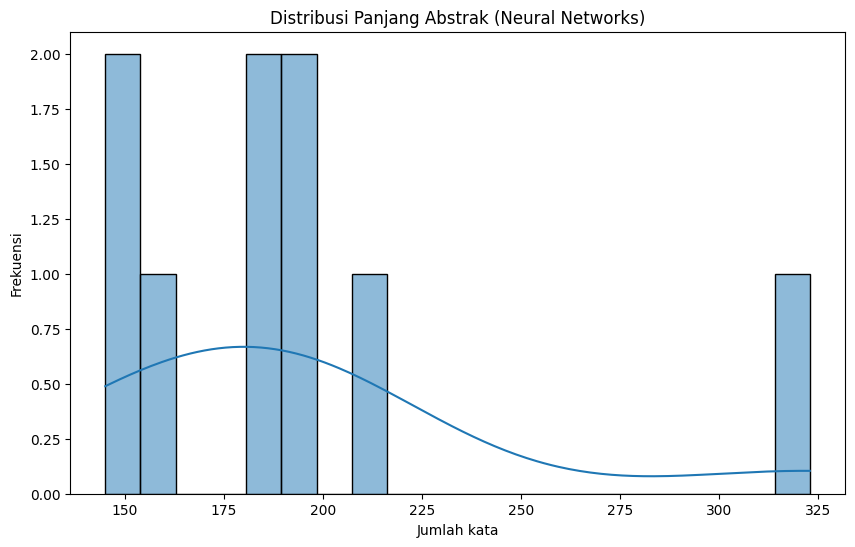

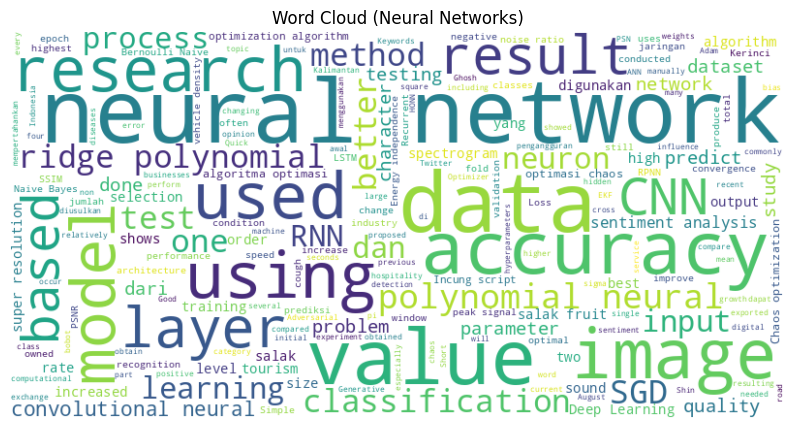


===== Fuzzy Logic Dataset =====
Jumlah abstrak: 6

Contoh 5 abstrak pertama:
0    The most important thing that can be done by t...
1    There are many agencies that have databases bu...
2    AbstrakPada 2025 diperkirakan 12,4 juta orang ...
3    AbstractCapital market has been beneficial to ...
4    AbstrakKebijaksanaan dalam mengambil sebuah ke...
Name: abstract, dtype: object

Statistik panjang abstrak:
count      6.000000
mean     257.833333
std       84.110443
min      167.000000
25%      198.250000
50%      236.000000
75%      318.000000
max      377.000000
Name: length, dtype: float64

Jumlah abstrak kosong: 0
Jumlah abstrak duplikat: 0


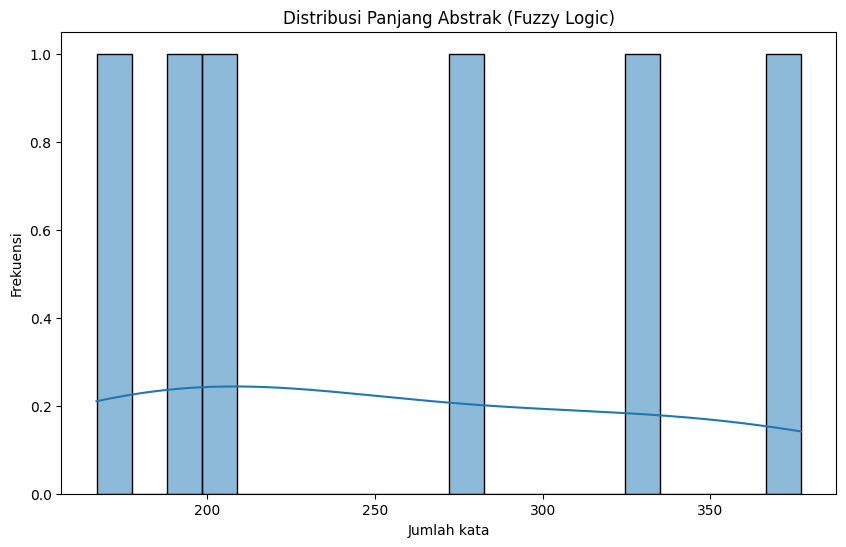

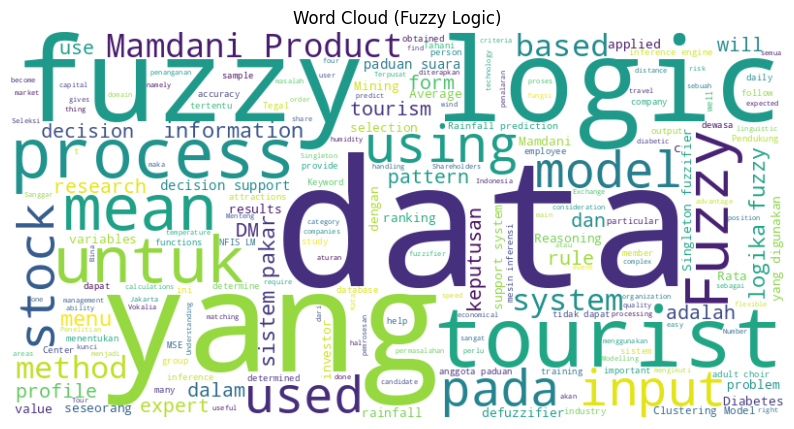


===== Machine Learning Dataset =====
Jumlah abstrak: 10

Contoh 5 abstrak pertama:
0     Electroencephalogram (EEG) records brain acti...
1    Penyakit jantung koroner adalah tersumbatnya s...
2    The use of signatures is often encountered in ...
3    Personality uniquely relates to our feeling an...
4    Cardiovascular disease (CVD) is the leading ca...
Name: abstract, dtype: object

Statistik panjang abstrak:
count     10.000000
mean     174.900000
std       35.491627
min      113.000000
25%      152.000000
50%      182.500000
75%      195.250000
max      232.000000
Name: length, dtype: float64

Jumlah abstrak kosong: 0
Jumlah abstrak duplikat: 0


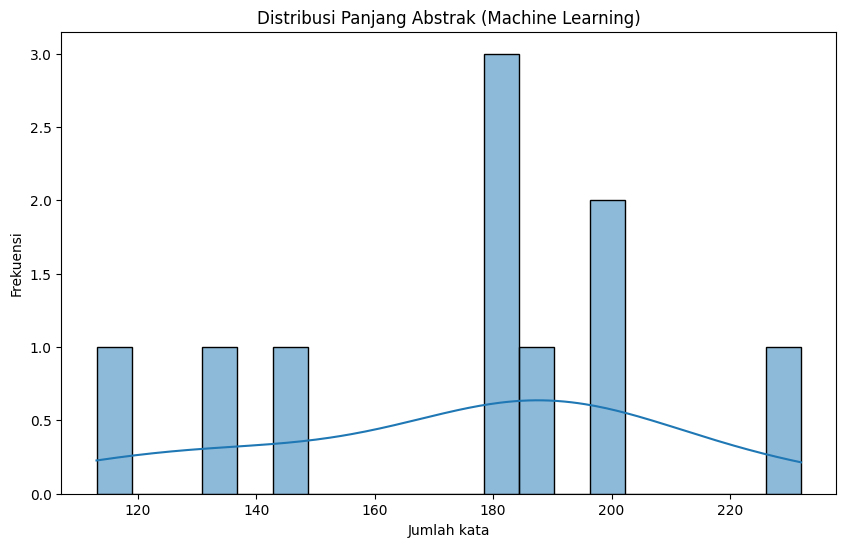

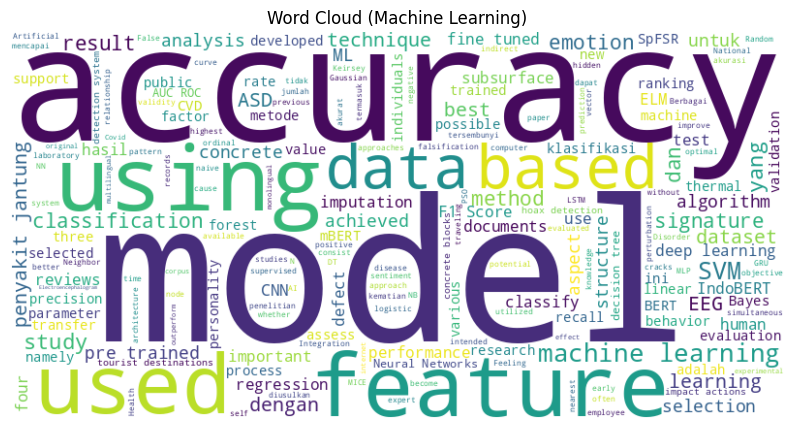

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Asumsikan dataset Anda dalam format numpy arrays
abst_nn_df = pd.DataFrame(abst_nn.values(), columns=['abstract'])
abst_fuzzl_df = pd.DataFrame(abst_fuzzl.values(), columns=['abstract'])
abst_machinel_df = pd.DataFrame(abst_machinel.values(), columns=['abstract'])

# Gabungkan dataset untuk eksplorasi
datasets = {'Neural Networks': abst_nn_df, 'Fuzzy Logic': abst_fuzzl_df, 'Machine Learning': abst_machinel_df}

# Fungsi untuk memplot distribusi panjang abstrak
def plot_length_distribution(df, topic):
    df['length'] = df['abstract'].apply(lambda x: len(x.split()))
    plt.figure(figsize=(10, 6))
    sns.histplot(df['length'], bins=20, kde=True)
    plt.title(f"Distribusi Panjang Abstrak ({topic})")
    plt.xlabel("Jumlah kata")
    plt.ylabel("Frekuensi")
    plt.show()

# Fungsi untuk membuat word cloud
def plot_wordcloud(df, topic):
    text = " ".join(abstract for abstract in df['abstract'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud ({topic})")
    plt.axis("off")
    plt.show()

# Eksplorasi dataset dengan statistik dan visualisasi
for topic, df in datasets.items():
    print(f"\n===== {topic} Dataset =====")

    # Ukuran dataset
    print(f"Jumlah abstrak: {df.shape[0]}")

    # Contoh 5 abstrak pertama
    print("\nContoh 5 abstrak pertama:")
    print(df['abstract'].head())

    # Panjang abstrak (jumlah kata per abstrak)
    df['length'] = df['abstract'].apply(lambda x: len(x.split()))

    # Statistik panjang abstrak
    print("\nStatistik panjang abstrak:")
    print(df['length'].describe())

    # Abstrak kosong atau duplikat
    print("\nJumlah abstrak kosong:", df['abstract'].isnull().sum())
    print("Jumlah abstrak duplikat:", df['abstract'].duplicated().sum())

    # Visualisasi distribusi panjang abstrak
    plot_length_distribution(df, topic)

    # Word cloud untuk setiap dataset
    plot_wordcloud(df, topic)


In [ ]:
abst_nn.values()

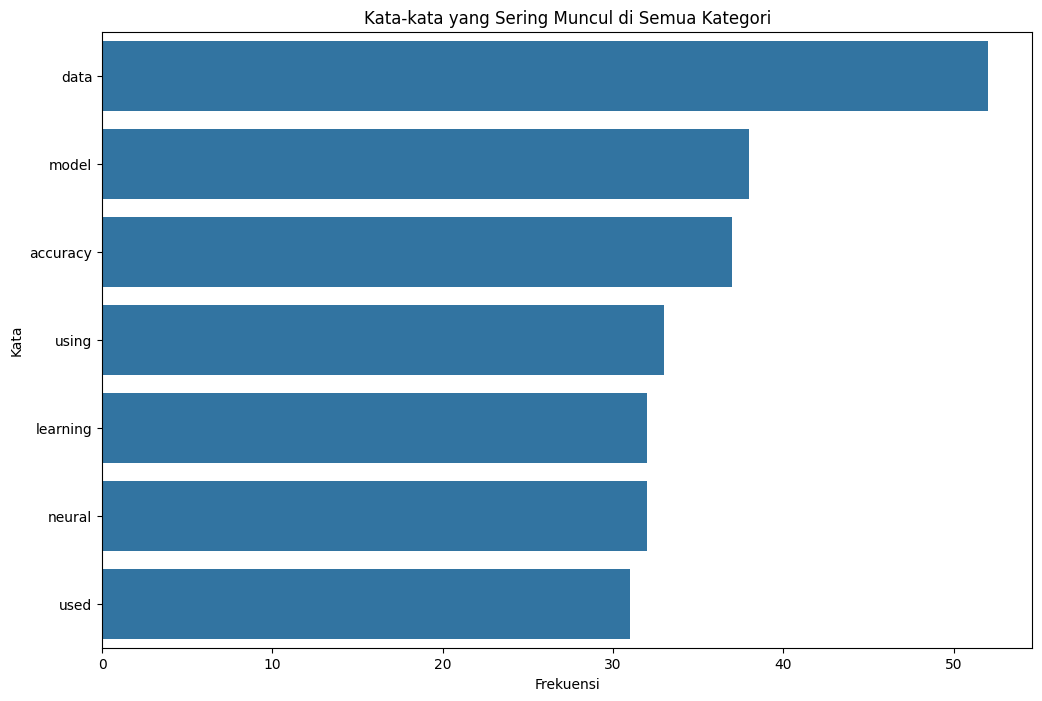

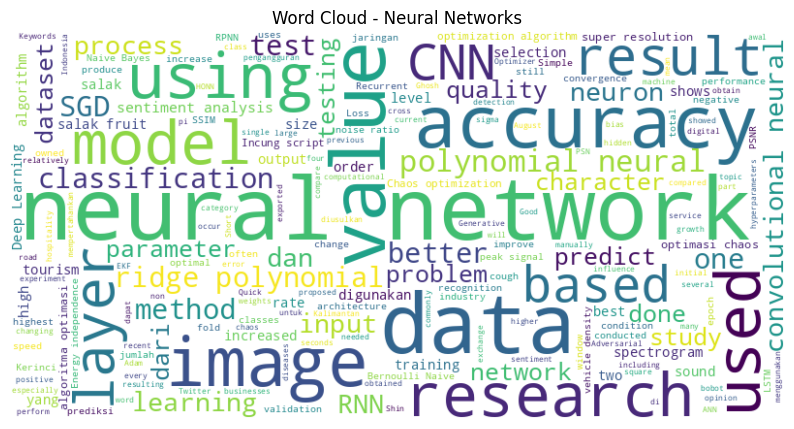

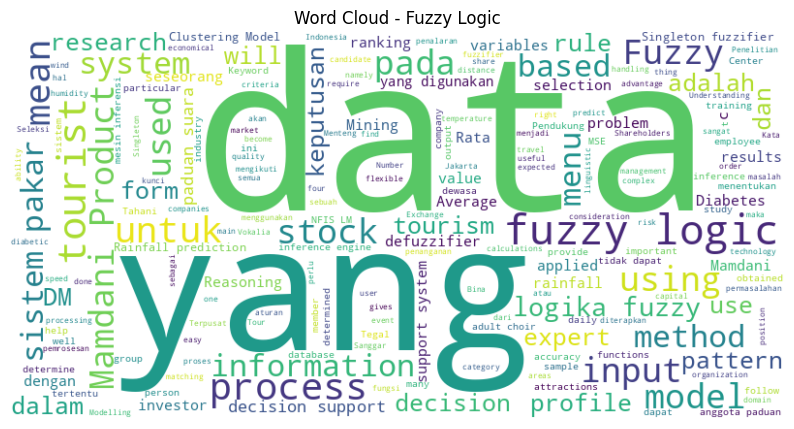

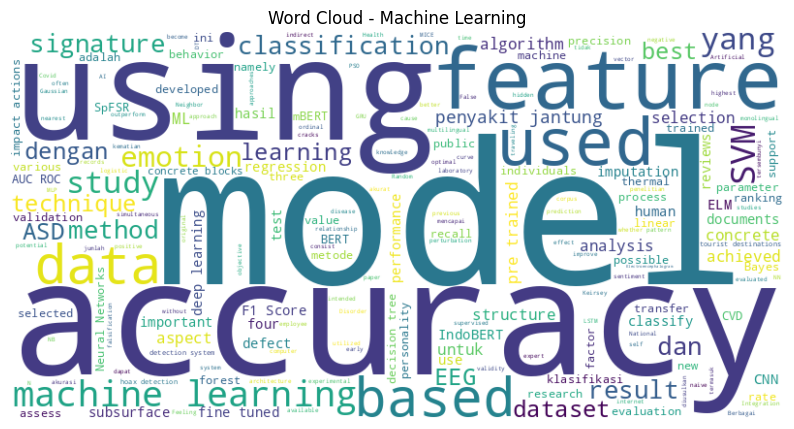

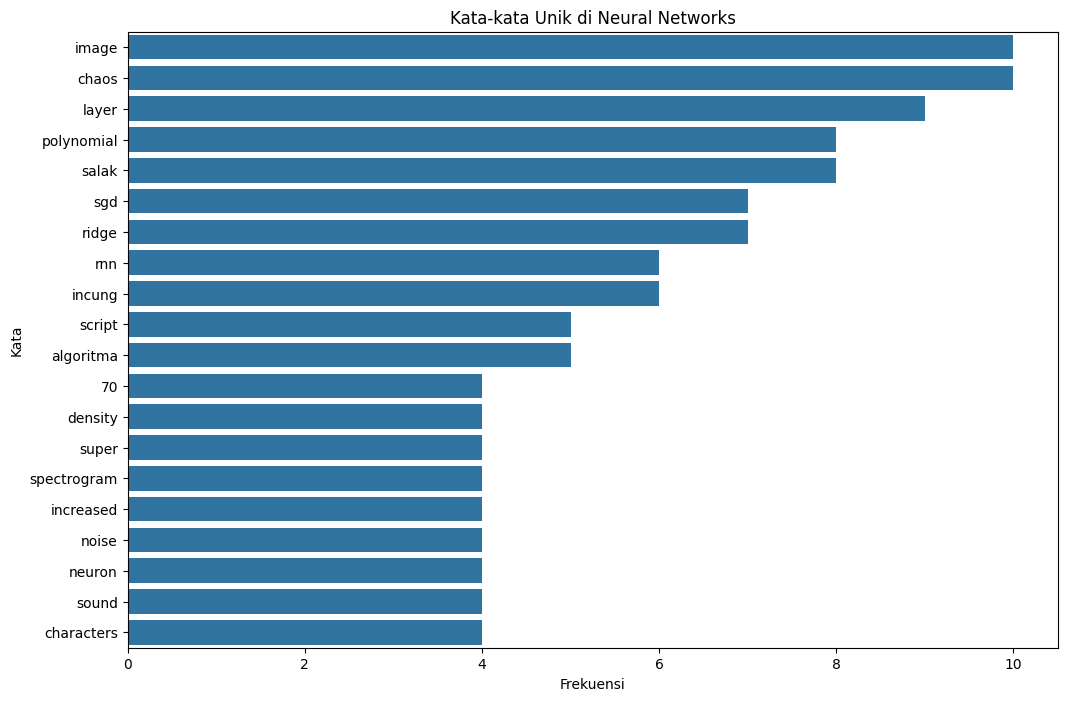

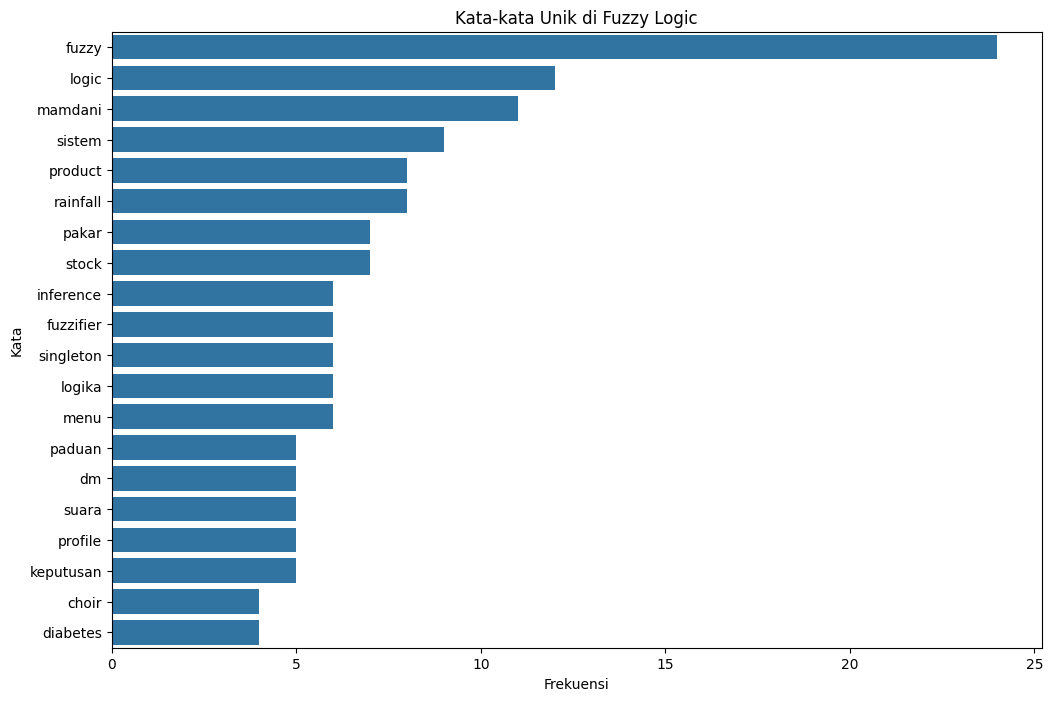

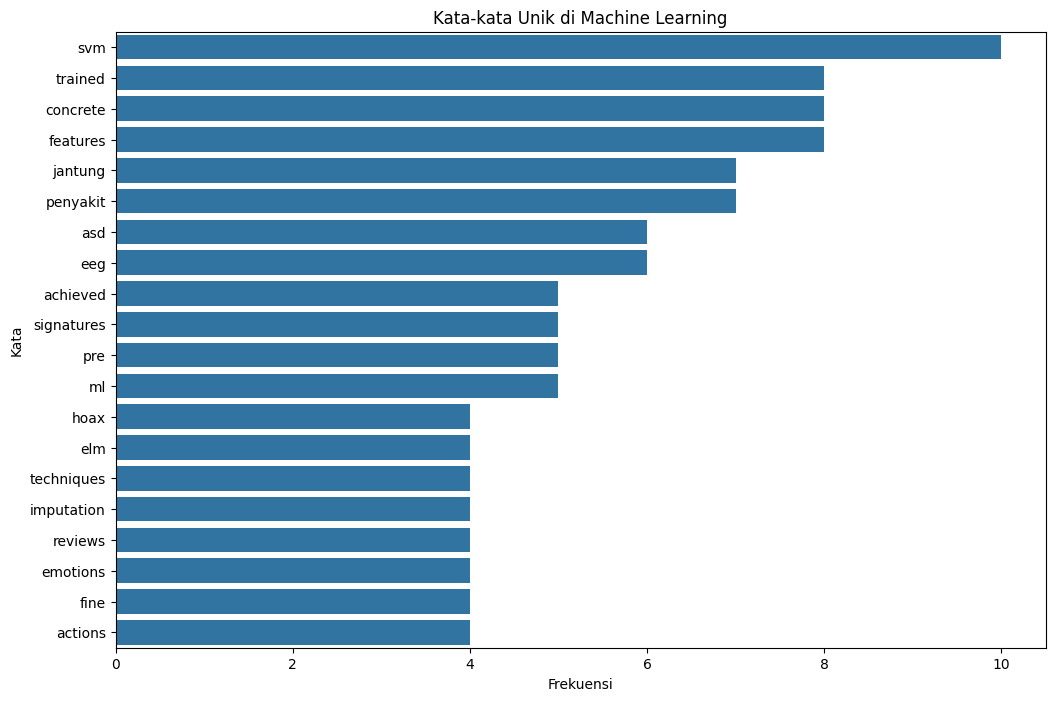

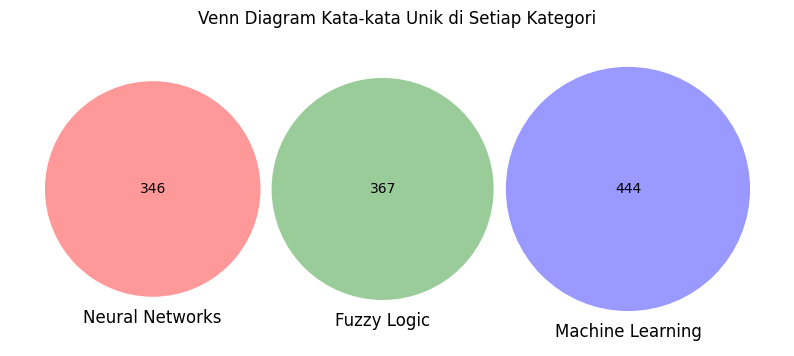

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib_venn import venn2, venn3
from sklearn.feature_extraction.text import CountVectorizer

# Asumsikan dataset Anda dalam format numpy arrays
abst_nn_df = pd.DataFrame(abst_nn.values(), columns=['abstract'])
abst_fuzzl_df = pd.DataFrame(abst_fuzzl.values(), columns=['abstract'])
abst_machinel_df = pd.DataFrame(abst_machinel.values(), columns=['abstract'])

# Gabungkan dataset untuk analisis
datasets = {
    'Neural Networks': abst_nn_df,
    'Fuzzy Logic': abst_fuzzl_df,
    'Machine Learning': abst_machinel_df
}

# Fungsi untuk menghitung frekuensi kata
def get_word_frequencies(df):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df['abstract'])
    word_freq = np.asarray(X.sum(axis=0)).flatten()
    words = vectorizer.get_feature_names_out()
    return pd.DataFrame({'word': words, 'frequency': word_freq}).sort_values(by='frequency', ascending=False)

# Frekuensi kata di seluruh dataset
all_words_freq = pd.DataFrame()
for topic, df in datasets.items():
    df_freq = get_word_frequencies(df)
    df_freq['category'] = topic
    all_words_freq = pd.concat([all_words_freq, df_freq], axis=0)

# Pivot table untuk mempermudah perbandingan
pivot_freq = all_words_freq.pivot_table(index='word', columns='category', values='frequency', fill_value=0)
pivot_freq['total'] = pivot_freq.sum(axis=1)

# Kata-kata yang sering muncul di semua kategori
common_words = pivot_freq[pivot_freq['total'] > len(datasets) * 10].reset_index()

# Kata-kata unik per kategori
unique_words = {}
for topic, df in datasets.items():
    other_topics = [t for t in datasets.keys() if t != topic]
    unique_words[topic] = pivot_freq[(pivot_freq[topic] > 0) & (pivot_freq[other_topics].sum(axis=1) == 0)].reset_index()

# Fungsi untuk memplot frekuensi kata yang sering muncul di semua kategori
def plot_common_words(df, top_n=20):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='total', y='word', data=df.sort_values(by='total', ascending=False).head(top_n))
    plt.title(f"Kata-kata yang Sering Muncul di Semua Kategori")
    plt.xlabel('Frekuensi')
    plt.ylabel('Kata')
    plt.show()

# Fungsi untuk membuat word cloud untuk setiap kategori
def plot_wordcloud_for_category(df, category):
    text = " ".join(abstract for abstract in df['abstract'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud - {category}")
    plt.axis("off")
    plt.show()

# Fungsi untuk memplot kata-kata unik di setiap kategori
def plot_unique_words(unique_words):
    for topic, unique_df in unique_words.items():
        plt.figure(figsize=(12, 8))
        unique_df_sorted = unique_df.sort_values(by=topic, ascending=False).head(20)
        sns.barplot(x=topic, y='word', data=unique_df_sorted)
        plt.title(f"Kata-kata Unik di {topic}")
        plt.xlabel('Frekuensi')
        plt.ylabel('Kata')
        plt.show()

# Fungsi untuk memplot Venn Diagram untuk kata-kata unik di masing-masing kategori
def plot_venn_diagram(unique_words):
    words_nn = set(unique_words['Neural Networks']['word'])
    words_fuzzl = set(unique_words['Fuzzy Logic']['word'])
    words_machinel = set(unique_words['Machine Learning']['word'])

    plt.figure(figsize=(10, 8))
    venn = venn3([words_nn, words_fuzzl, words_machinel],
                 ('Neural Networks', 'Fuzzy Logic', 'Machine Learning'))
    plt.title('Venn Diagram Kata-kata Unik di Setiap Kategori')
    plt.show()

# Plot frekuensi kata yang sering muncul
plot_common_words(common_words)

# Plot Word Cloud untuk setiap kategori
for topic, df in datasets.items():
    plot_wordcloud_for_category(df, topic)

# Plot kata-kata unik per kategori
plot_unique_words(unique_words)

# Plot Venn Diagram untuk kata-kata unik
plot_venn_diagram(unique_words)


#### TFIDF

In [ ]:
def tf_idf(data, stem=False, stop_word=False):
  tf_documents = []
  ps = PorterStemmer()

  # hitung TF
  for doc_id, text in data.items():
    tokens = word_tokenize(text.lower())
    if stem == True and stop_word == True:
      tokens = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]

    tokens = [word for word in tokens if word not in string.punctuation]

    # hitung tf
    tf = Counter(tokens)

    # menyimpan hasil TF untuk dokumen
    tf_documents.append(tf)

  # hitung DF
  df = Counter()
  for tf in tf_documents:
    for term in tf:
      df[term] += 1

  # hitung IDF
  N = len(data)
  idf = {}
  for term, freq in df.items():
    idf[term] = math.log(N / freq)

  # Hitung TF-IDF untuk setiap dokumen
  tfidf = []
  for tf in tf_documents:
    tfidf_doc = {}
    for term, freq in tf.items():
      tfidf_doc[term] = freq * idf[term]
    tfidf.append(tfidf_doc)

  return tfidf, idf

In [ ]:
tfidf, idf_lama = tf_idf(abst_nn)

In [ ]:
def article_to_vector(articles, tf_idf):
  terms = set()
  for tfidf_doc in tf_idf:
    terms.update(tfidf_doc.keys())

  terms = sorted(terms)
  vectors = []
  for tfidf_doc in tf_idf:
    vector = [tfidf_doc.get(term, 0.0) for term in terms]
    vectors.append(vector)

  return vectors

In [ ]:
vector_doc = article_to_vector(abst_nn, tfidf)

gabungan semua

In [ ]:
def tfidf_vectorizer(data, stem=False, stop_word=False):
  tf_documents = []
  ps = PorterStemmer()

  # hitung TF
  for doc_id, text in data.items():
    tokens = word_tokenize(text.lower())
    if stem and stop_word:
      tokens = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
    elif stem:
      tokens = [ps.stem(word) for word in tokens]
    elif stop_word:
      tokens = [word for word in tokens if word not in stopwords.words('english')]

    tokens = [word for word in tokens if word not in string.punctuation]

    # hitung tf
    tf = Counter(tokens)

    # menyimpan hasil TF untuk dokumen
    tf_documents.append(tf)

  # hitung DF
  df = Counter()
  for tf in tf_documents:
    for term in tf:
      df[term] += 1

  # hitung IDF
  N = len(data)
  idf = {}
  for term, freq in df.items():
    idf[term] = math.log(N / freq)

  # Hitung TF-IDF untuk setiap dokumen
  tfidf = []
  for tf in tf_documents:
    tfidf_doc = {}
    for term, freq in tf.items():
      tfidf_doc[term] = freq * idf[term]
    tfidf.append(tfidf_doc)

  # Buat vektor dokumen berdasarkan TF-IDF
  terms = sorted(set(term for tfidf_doc in tfidf for term in tfidf_doc.keys()))
  vectors = []
  for tfidf_doc in tfidf:
    vector = [tfidf_doc.get(term, 0.0) for term in terms]
    vectors.append(vector)

  return tfidf, idf, vectors

In [ ]:
tfidf_abst_nn, idf_abst_nn, vectors_abst_nn = tfidf_vectorizer(abst_nn, stem=True, stop_word=True)
tfidf_abst_fuzzl, idf_abst_fuzzl, vectors_abst_fuzzl = tfidf_vectorizer(abst_fuzzl, stem=True, stop_word=True)
tfidf_abst_machinel, idf_abst_machinel, vectors_abst_machinel = tfidf_vectorizer(abst_machinel, stem=True, stop_word=True)

In [ ]:
def cosine_similarity(vec1, vec2):
  dot_product = np.dot(vec1, vec2)
  magnitude = np.linalg.norm(vec1) * np.linalg.norm(vec2)
  if not magnitude:
    return 0.0
  return dot_product / magnitude

In [ ]:
cosine_similarity(vectors_abst_nn[1], vectors_abst_nn[3])

0.026482485259202587

Inspeksi Hasil

In [ ]:
def kemiripan_antara_dokumen(vectors,type="Machine Learning"):
  n_docs = len(vectors)
  cosine_matrix = np.zeros((n_docs, n_docs))

  for i in range(n_docs):
    for j in range(i, n_docs):
      cosine_sim = cosine_similarity(vectors[i], vectors[j])
      cosine_matrix[i, j] = cosine_sim
      cosine_matrix[j, i] = cosine_sim

  upper_triangle = cosine_matrix[np.triu_indices(n_docs, k=1)]
  average_similarity = np.mean(upper_triangle)
  median_similarity = np.median(upper_triangle)
  # Variance dan Standard Deviation
  variance_similarity = np.var(upper_triangle)
  std_dev_similarity = np.std(upper_triangle)

  # Plot distribusi Cosine Similarity
  sns.histplot(upper_triangle, kde=True)
  plt.title("Distribusi Cosine Similarity")
  plt.xlabel("Cosine Similarity")
  plt.ylabel("Frekuensi")
  plt.show()

  return average_similarity, median_similarity, variance_similarity, std_dev_similarity, cosine_matrix

In [ ]:
tfidf_abst_nn, idf_abst_nn, vectors_abst_nn = tfidf_vectorizer(abst_nn, stem=False, stop_word=True)
tfidf_abst_fuzzl, idf_abst_fuzzl, vectors_abst_fuzzl = tfidf_vectorizer(abst_fuzzl, stem=False, stop_word=True)
tfidf_abst_machinel, idf_abst_machinel, vectors_abst_machinel = tfidf_vectorizer(abst_machinel, stem=False, stop_word=True)

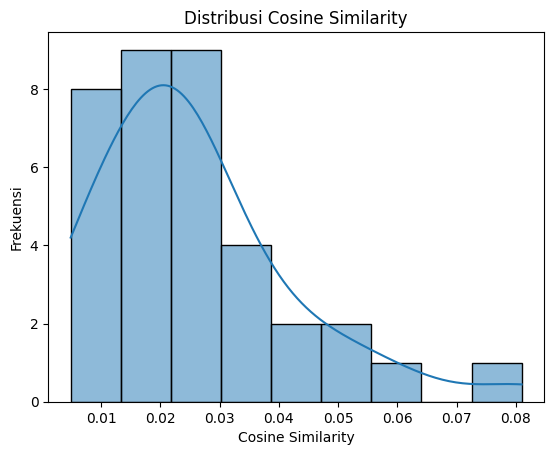

(0.025558033397417745,
 0.023299883163716128,
 0.0002710586284146858,
 0.01646385824813509)

In [ ]:
average_similarity, median_similarity, variance_similarity, std_dev_similarity, _ = kemiripan_antara_dokumen(vectors_abst_nn)
average_similarity, median_similarity, variance_similarity, std_dev_similarity

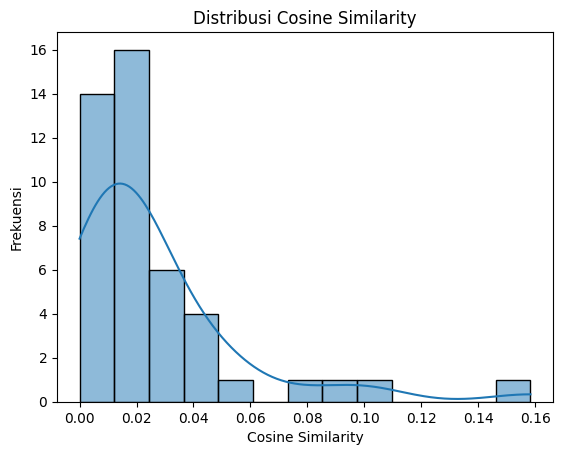

In [ ]:
_, _, _, _, cosine_matrix = kemiripan_antara_dokumen(vectors_abst_machinel)

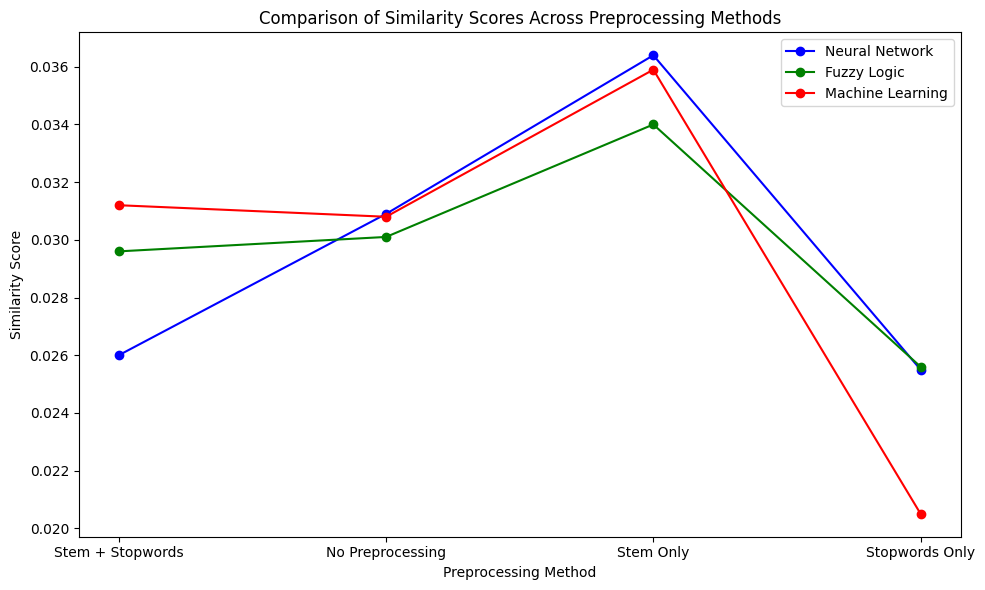

In [ ]:
import matplotlib.pyplot as plt

# Data skor kemiripan untuk setiap kategori dan teknik preprocessing
preprocessing_methods = ['Stem + Stopwords', 'No Preprocessing', 'Stem Only', 'Stopwords Only']
abst_nn_scores = [0.0260, 0.0309, 0.0364, 0.0255]
abst_fuzzl_scores = [0.0296, 0.0301, 0.0340, 0.0256]
abst_machinel_scores = [0.0312, 0.0308, 0.0359, 0.0205]

# Plotting line chart
plt.figure(figsize=(10, 6))

# Plotting for each category
plt.plot(preprocessing_methods, abst_nn_scores, marker='o', label='Neural Network', color='blue')
plt.plot(preprocessing_methods, abst_fuzzl_scores, marker='o', label='Fuzzy Logic', color='green')
plt.plot(preprocessing_methods, abst_machinel_scores, marker='o', label='Machine Learning', color='red')

# Adding labels and title
plt.xlabel('Preprocessing Method')
plt.ylabel('Similarity Score')
plt.title('Comparison of Similarity Scores Across Preprocessing Methods')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [27]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Tokenize dan preprocess dokumen
def preprocess_tokens(text, use_stopwords=True, use_stemming=False):
    ps = PorterStemmer()
    tokens = word_tokenize(text.lower())

    if use_stopwords:
        tokens = [word for word in tokens if word not in stopwords.words('english')]

    if use_stemming:
        tokens = [ps.stem(word) for word in tokens]

    return tokens

# Fungsi untuk menghitung overlap dan menampilkan kata yang berkontribusi
def analyze_overlap(doc1, doc2, use_stopwords=True, use_stemming=False):
    tokens_doc1 = preprocess_tokens(doc1, use_stopwords, use_stemming)
    tokens_doc2 = preprocess_tokens(doc2, use_stopwords, use_stemming)

    overlap_words = set(tokens_doc1).intersection(tokens_doc2)

    # Menghitung proporsi stopwords
    stopwords_list = stopwords.words('english')
    stopword_overlap = [word for word in overlap_words if word in stopwords_list]
    relevant_overlap = [word for word in overlap_words if word not in stopwords_list]

    print(f"Total Overlap Words: {len(overlap_words)}")
    print(f"Stopwords in Overlap: {stopword_overlap}")
    print(f"Relevant Words in Overlap: {relevant_overlap}")

    return len(stopword_overlap), len(relevant_overlap)

# Contoh dua dokumen
doc1 = list(abst_nn.values())[0]
doc2 = list(abst_nn.values())[3]

# Menganalisis overlap antara dokumen dengan stemming tapi tanpa penghapusan stopwords
stopword_overlap, relevant_overlap = analyze_overlap(doc1, doc2, use_stopwords=False, use_stemming=True)

# Menghitung proporsi stopwords
print(f"Proportion of stopwords in overlap: {stopword_overlap / (stopword_overlap + relevant_overlap):.2f}")


Total Overlap Words: 36
Stopwords in Overlap: ['for', 'an', 'it', 'by', 'that', 'is', 'from', 'to', 'of', 'the', 'in', 'with', 'a', 'on', 'as', 'and']
Relevant Words in Overlap: ['process', 'thi', 'model', 'neural', 'base', '%', 'result', ',', 'accuraci', 'wa', 'use', 'valu', 'layer', 'network', '.', '(', 'deep', ')', 'show', 'research']
Proportion of stopwords in overlap: 0.44


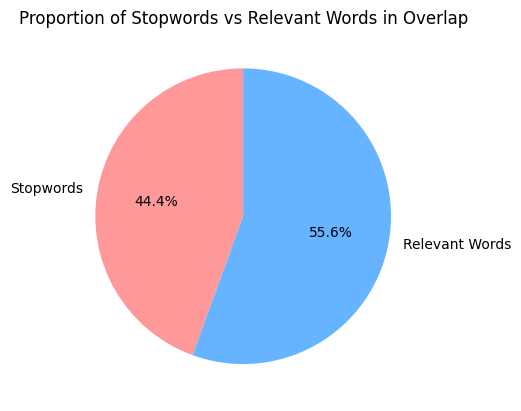

In [28]:
# Visualisasi proporsi stopwords
import matplotlib.pyplot as plt

labels = ['Stopwords', 'Relevant Words']
sizes = [stopword_overlap, relevant_overlap]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Stopwords vs Relevant Words in Overlap')
plt.show()


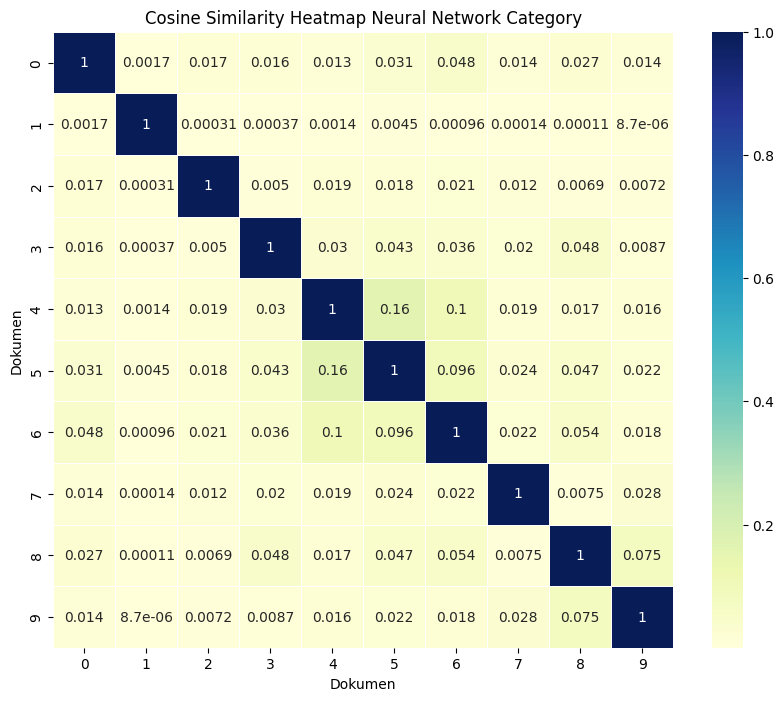

In [ ]:
|import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari cosine_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)

# Menambahkan judul dan label sumbu
plt.title("Cosine Similarity Heatmap Neural Network Category")
plt.xlabel("Dokumen")
plt.ylabel("Dokumen")

# Tampilkan heatmap
plt.show()

In [ ]:
# Menghitung rata-rata cosine similarity untuk setiap dokumen
average_similarity_per_doc = np.mean(cosine_matrix, axis=1)

# Mengidentifikasi dokumen dengan rata-rata cosine similarity terendah
lowest_similarity_doc_index = np.argmin(average_similarity_per_doc)
lowest_similarity_doc_value = average_similarity_per_doc[lowest_similarity_doc_index]

print(f"Dokumen dengan tingkat kemiripan rata-rata terendah adalah dokumen ke-{lowest_similarity_doc_index}, dengan nilai rata-rata kemiripan: {lowest_similarity_doc_value:.4f}")

# Menampilkan kemiripan dokumen tersebut dengan dokumen lainnya
print("Tingkat kemiripan dokumen ini dengan dokumen lainnya:")
print(cosine_matrix[lowest_similarity_doc_index])


Dokumen dengan tingkat kemiripan rata-rata terendah adalah dokumen ke-1, dengan nilai rata-rata kemiripan: 0.1010
Tingkat kemiripan dokumen ini dengan dokumen lainnya:
[1.73251019e-03 1.00000000e+00 3.05624214e-04 3.74370714e-04
 1.43070463e-03 4.48974483e-03 9.56964510e-04 1.35093062e-04
 1.14564003e-04 8.71948668e-06]


In [ ]:
list(abst_fuzzl.values())[0]

'\xa0Electroencephalogram (EEG) records brain activity as electrical currents to discern emotions. As interest in human-computer emotional connections rises, reliable and implementable emotion recognition algorithms are essential. This study classifies EEG waves using machine and deep learning. A four-channel Muse EEG headband recorded neutral, negative, and positive emotions for the publicly available Feeling Emotions EEG dataset. Convolutional Neural Networks (CNN), Long Short-Term Memory (LSTM), and Gated Recurrent Unit (GRU) were utilized for deep learning, while SVM, K-NN, and MLP were used for machine learning. The models were assessed for accuracy, precision, recall, and F1-Score. SVM, K-NN, and MLP have accuracy scores of 0.98, 0.95, and 0.97. Deep learning methods CNN, LSTM, and GRU had 0.98, 0.82, and 0.97 accuracy. SVM and CNN surpassed other approaches in accuracy, precision, recall, and F1-Score. The research shows that machine learning and deep learning can classify EEG s

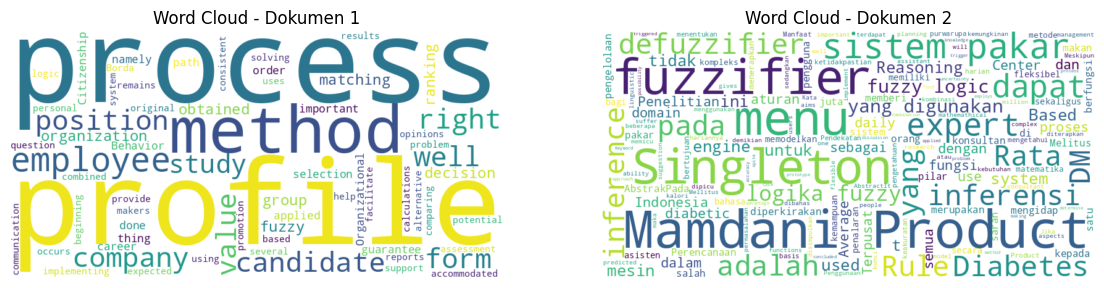

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil teks dari dua dokumen
doc1_text = list(abst_fuzzl.values())[0]  # Dokumen dengan kemiripan rendah
doc2_text = list(abst_fuzzl.values())[2]  # Dokumen lainnya dalam kategori Fuzzy Logic (ubah index jika perlu)

# Buat word cloud untuk dokumen 1
wordcloud_doc1 = WordCloud(width=800, height=400, background_color='white').generate(doc1_text)

# Buat word cloud untuk dokumen 2
wordcloud_doc2 = WordCloud(width=800, height=400, background_color='white').generate(doc2_text)

# Plot word cloud untuk dokumen 1
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_doc1, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Dokumen 1")

# Plot word cloud untuk dokumen 2
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_doc2, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Dokumen 2")

plt.show()


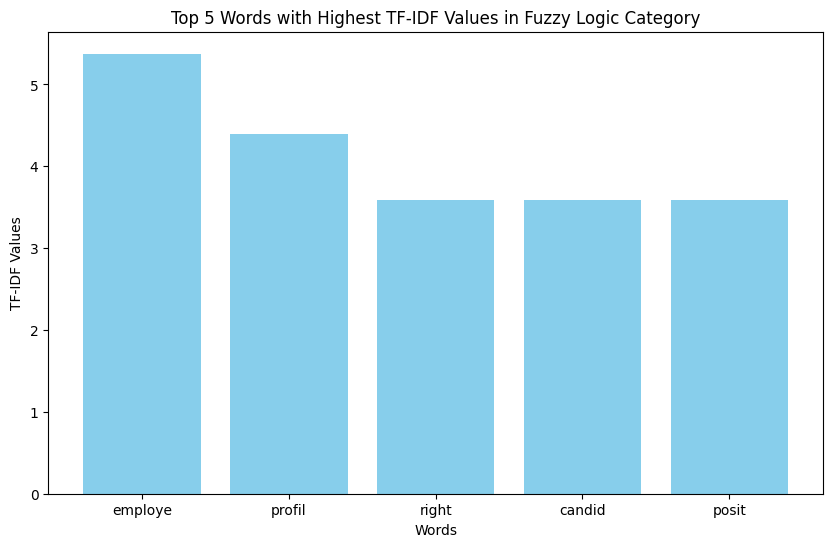

In [ ]:
import matplotlib.pyplot as plt

# Mengambil data TF-IDF dari tfidf_abst_nn
tfidf_data = tfidf_abst_fuzzl[0]

# Mengurutkan kata berdasarkan nilai TF-IDF secara menurun
sorted_tfidf = sorted(tfidf_data.items(), key=lambda x: x[1], reverse=True)

# Memilih 5 kata dengan nilai TF-IDF tertinggi
top_5_tfidf = sorted_tfidf[:5]

# Memisahkan kata dan nilainya untuk visualisasi
words = [item[0] for item in top_5_tfidf]
values = [item[1] for item in top_5_tfidf]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, values, color='skyblue')

# Menambahkan judul dan label sumbu
plt.title("Top 5 Words with Highest TF-IDF Values in Fuzzy Logic Category")
plt.xlabel("Words")
plt.ylabel("TF-IDF Values")

# Tampilkan plot
plt.show()


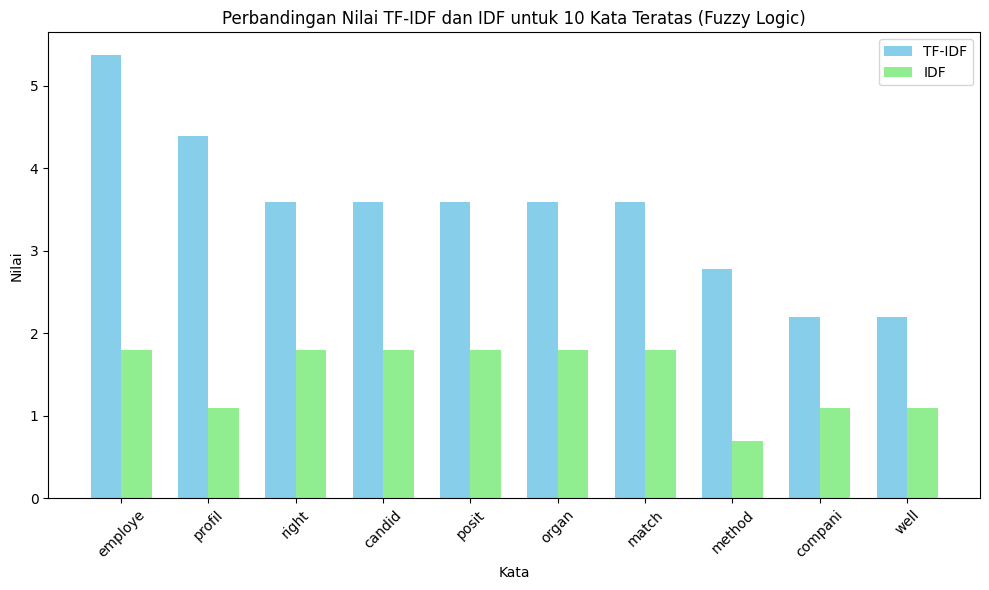

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mengambil data TF-IDF dari tfidf_abst_nn
tfidf_data = tfidf_abst_fuzzl[0]
idf_data = idf_abst_fuzzl

# Mengurutkan kata berdasarkan nilai TF-IDF secara menurun
sorted_tfidf = sorted(tfidf_data.items(), key=lambda x: x[1], reverse=True)

# Memilih 5 kata dengan nilai TF-IDF tertinggi
top_5_tfidf = sorted_tfidf[:10]

# Membuat list kata, TF-IDF, dan IDF untuk 5 kata teratas
words = [item[0] for item in top_5_tfidf]
tfidf_values = [item[1] for item in top_5_tfidf]
idf_values = [idf_data.get(word, 0) for word in words]  # Mengambil nilai IDF atau 0 jika tidak ditemukan

# Tentukan posisi bar chart
x = np.arange(len(words))
width = 0.35  # Lebar bar

# Membuat plot
plt.figure(figsize=(10, 6))

# Plot bar TF-IDF dan IDF
plt.bar(x - width/2, tfidf_values, width, label='TF-IDF', color='skyblue')
plt.bar(x + width/2, idf_values, width, label='IDF', color='lightgreen')

# Menambahkan judul, label sumbu, dan legenda
plt.title("Perbandingan Nilai TF-IDF dan IDF untuk 10 Kata Teratas (Fuzzy Logic)")
plt.xlabel("Kata")
plt.ylabel("Nilai")
plt.xticks(x, words, rotation=45)
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


#### New Documentt

In [ ]:
def transform_new_document(new_doc, idf, stem=False, stop_word=False):
  ps = PorterStemmer()
  tf_documents = []

  for doc_id, text in new_doc.items():
    tokens = word_tokenize(text.lower())

    if stem and stop_word:
      tokens = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
    elif stem:
      tokens = [ps.stem(word) for word in tokens]
    elif stop_word:
      tokens = [word for word in tokens if word not in stopwords.words('english')]

    tokens = [word for word in tokens if word not in string.punctuation]

    # hitung tf
    tf = Counter(tokens)

    # menyimpan hasil TF untuk dokumen
    tf_documents.append(tf)

  tfidf = []
  for tf in tf_documents:
    tfidf_doc = {}
    for term, freq in tf.items():
      if term in idf:
        tfidf_doc[term] = freq * idf[term]
    tfidf.append(tfidf_doc)

  return tfidf

In [ ]:
def new_document_to_vector(tfidf_dict, all_terms):
  vector = [tfidf_dict.get(term, 0) for term in all_terms]
  return vector

In [ ]:
import statistics

def predict(document, idf_old, categories_vectors):
  average_per_categories = {}
  for idx, category in enumerate(categories_vectors):
    similarities = []
    idf = idf_old[idx]
    tfidf_old_document = transform_new_document(document, idf, stem=True, stop_word=True)
    all_terms = list(idf.keys())
    vector_new_doc = new_document_to_vector(tfidf_old_document[0], all_terms)

    for vector in category:
      similarity = cosine_similarity(vector, vector_new_doc)
      similarities.append(similarity)
    average_per_categories[f"category {idx}"]= statistics.mean(similarities)

  return average_per_categories

In [ ]:
fuzzy_predict = predict(test_abs_fuzzl, idf_old = [idf_abst_nn, idf_abst_fuzzl, idf_abst_machinel], categories_vectors = [vectors_abst_nn, vectors_abst_fuzzl, vectors_abst_machinel])
machinel_predict = predict(test_abs_machinel, idf_old = [idf_abst_nn, idf_abst_fuzzl, idf_abst_machinel], categories_vectors = [vectors_abst_nn, vectors_abst_fuzzl, vectors_abst_machinel])
nn_predict = predict(test_abs_nn, idf_old = [idf_abst_nn, idf_abst_fuzzl, idf_abst_machinel], categories_vectors = [vectors_abst_nn, vectors_abst_fuzzl, vectors_abst_machinel])
non_predict = predict(test_abs_non_kategori, idf_old = [idf_abst_nn, idf_abst_fuzzl, idf_abst_machinel], categories_vectors = [vectors_abst_nn, vectors_abst_fuzzl, vectors_abst_machinel])

In [ ]:
fuzzy_predict

{'category 0': 0.049028207051267245,
 'category 1': 0.0954087244225422,
 'category 2': 0.050302586810462534}

In [ ]:
machinel_predict

{'category 0': 0.08578029484995697,
 'category 1': 0.048701888178685065,
 'category 2': 0.07002871119030815}

In [ ]:
nn_predict

{'category 0': 0.06405014749298155,
 'category 1': 0.04858634933175272,
 'category 2': 0.0651949511491009}

In [ ]:
test_abs_nn

{'Hyperparameter Optimization Techniques for CNN-Based Cyber Security Attack Classification': "Abstract The proliferation of cyber security attacks necessitates advanced and efficient detection methods. This study explores the application of Convolutional Neural Networks (CNNs) for classifying cyber security attacks using a comprehensive dataset containing various attack types and network traffic features. Emphasizing the role of hyperparameter optimization (HPO) techniques, this research aims to enhance the CNN model's performance in accurately detecting and classifying cyber attacks. Traditional machine learning approaches often need to catch up in capturing the complex patterns in such data, whereas CNNs excel in automatically extracting hierarchical features. Using the provided dataset, which includes attributes such as packet length, source and destination ports, protocol, and traffic type, we implemented various (HPO) techniques, including Grid Search, Random Search, and Bayesian

In [ ]:
non_predict

{'category 0': 0.040197163039012766,
 'category 1': 0.0398480286771253,
 'category 2': 0.03199872838292191}

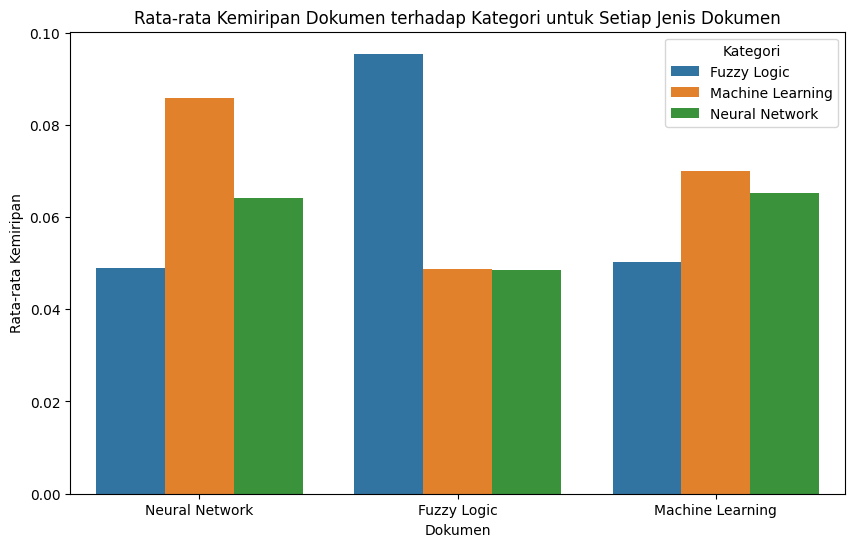

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data prediksi
fuzzy_predict = {'Neural Network': 0.049028207051267245,
                  'Fuzzy Logic': 0.0954087244225422,
                  'Machine Learning': 0.050302586810462534}

machinel_predict = {'Neural Network': 0.08578029484995697,
                    'Fuzzy Logic': 0.048701888178685065,
                    'Machine Learning': 0.07002871119030815}

nn_predict = {'Neural Network': 0.06405014749298155,
              'Fuzzy Logic': 0.04858634933175272,
              'Machine Learning': 0.0651949511491009}

# Mengubah data menjadi format yang bisa diproses oleh seaborn
data = {
    'Category': list(fuzzy_predict.keys()) * 3,
    'Average Similarity': list(fuzzy_predict.values()) + list(machinel_predict.values()) + list(nn_predict.values()),
    'Document Type': ['Fuzzy Logic'] * len(fuzzy_predict) + ['Machine Learning'] * len(machinel_predict) + ['Neural Network'] * len(nn_predict)
}

# Buat DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Average Similarity', hue='Document Type', data=df)
plt.title('Rata-rata Kemiripan Dokumen terhadap Kategori untuk Setiap Jenis Dokumen')
plt.ylabel('Rata-rata Kemiripan')
plt.xlabel('Dokumen')
plt.legend(title='Kategori')
plt.show()


In [ ]:
from collections import Counter

# Fungsi untuk tokenisasi dan preprocessing
def preprocess(text):
    ps = PorterStemmer()
    # Tokenisasi dan hapus stopwords
    tokens = word_tokenize(text.lower())
    tokens = tokens = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
    tokens = [word for word in tokens if word not in string.punctuation]
    return set(tokens)

# Ambil teks dari test_abs_nn
test_doc_tokens = preprocess(list(test_abs_nn.values())[0])

# Ambil teks dari setiap dokumen di abst_machinel
overlaps = {}
for idx, (title, content) in enumerate(abst_nn.items()):
    content_tokens = preprocess(content)
    overlap_count = len(test_doc_tokens.intersection(content_tokens))
    overlaps[idx] = overlap_count

# Tampilkan hasil overlap
print("Overlap counts between test document and each document in abst_nn:")
cek = 0
for doc, count in overlaps.items():
    print(f"{doc}: {count} overlapping words")
    cek += count
print("Average Overlaping: ", cek / len(abst_nn))

Overlap counts between test document and each document in abst_nn:
0: 18 overlapping words
1: 11 overlapping words
2: 10 overlapping words
3: 12 overlapping words
4: 13 overlapping words
5: 15 overlapping words
6: 17 overlapping words
7: 9 overlapping words
8: 18 overlapping words
Average Overlaping:  13.666666666666666


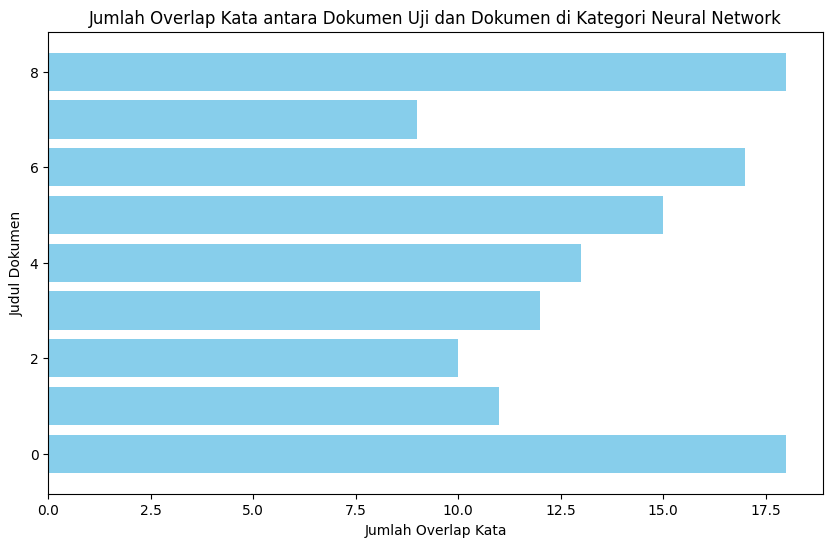

In [ ]:
import matplotlib.pyplot as plt

# Data untuk plot
doc_titles = list(overlaps.keys())
overlap_counts = list(overlaps.values())

# Plot
plt.figure(figsize=(10, 6))
plt.barh(doc_titles, overlap_counts, color='skyblue')
plt.xlabel('Jumlah Overlap Kata')
plt.ylabel('Judul Dokumen')
plt.title('Jumlah Overlap Kata antara Dokumen Uji dan Dokumen di Kategori Neural Network')
plt.show()


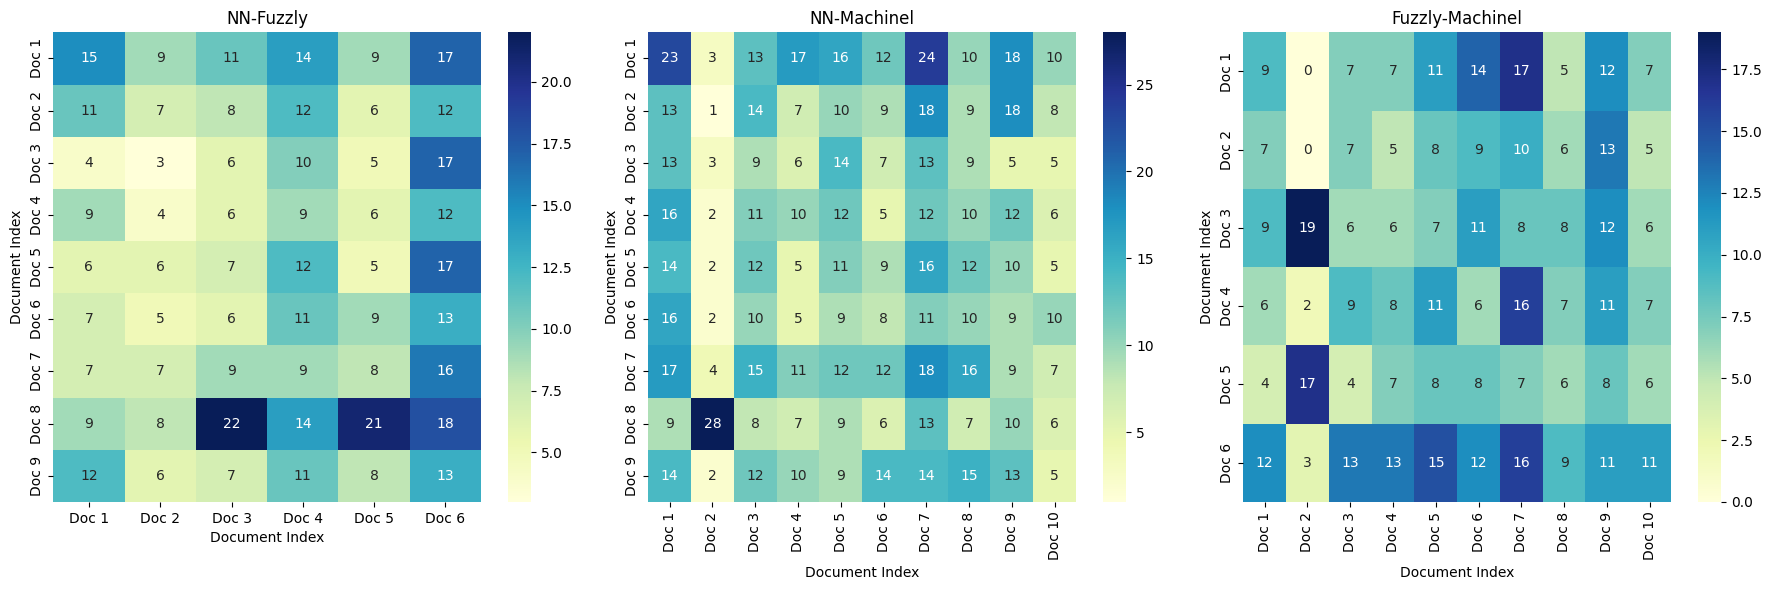

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Fungsi untuk tokenisasi dan preprocessing
def preprocess(text):
    ps = PorterStemmer()
    tokens = word_tokenize(text.lower())
    tokens = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
    tokens = [word for word in tokens if word not in string.punctuation]
    return set(tokens)

# Tokenisasi dan preprocessing untuk dokumen di setiap kategori
def get_tokens_dict(docs):
    return {idx: preprocess(content) for idx, content in enumerate(docs.values())}

# Ambil token untuk dokumen dalam setiap kategori
tokens_nn = get_tokens_dict(abst_nn)
tokens_fuzzly = get_tokens_dict(abst_fuzzl)
tokens_machinel = get_tokens_dict(abst_machinel)

# Fungsi untuk menghitung overlap antar dokumen
def calculate_overlap(tokens_dict1, tokens_dict2):
    n_docs1 = len(tokens_dict1)
    n_docs2 = len(tokens_dict2)
    overlap_matrix = np.zeros((n_docs1, n_docs2))

    for idx1, tokens1 in tokens_dict1.items():
        for idx2, tokens2 in tokens_dict2.items():
            overlap_count = len(tokens1.intersection(tokens2))
            overlap_matrix[idx1, idx2] = overlap_count

    return overlap_matrix

# Hitung overlap antar dokumen untuk setiap pasangan kategori
overlap_nn_fuzzly = calculate_overlap(tokens_nn, tokens_fuzzly)
overlap_nn_machinel = calculate_overlap(tokens_nn, tokens_machinel)
overlap_fuzzly_machinel = calculate_overlap(tokens_fuzzly, tokens_machinel)


# Gabungkan semua matriks overlap
overlap_all = {
    'NN-Fuzzly': overlap_nn_fuzzly,
    'NN-Machinel': overlap_nn_machinel,
    'Fuzzly-Machinel': overlap_fuzzly_machinel
}

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (title, matrix) in zip(axes, overlap_all.items()):
    sns.heatmap(matrix, annot=True, cmap='YlGnBu', ax=ax,
                xticklabels=[f'Doc {i+1}' for i in range(matrix.shape[1])],
                yticklabels=[f'Doc {i+1}' for i in range(matrix.shape[0])])
    ax.set_title(title)
    ax.set_xlabel('Document Index')
    ax.set_ylabel('Document Index')

plt.tight_layout()
plt.show()


In [ ]:
overlap_nn_fuzzly

array([[15.,  9., 11., 14.,  9., 17.],
       [11.,  7.,  8., 12.,  6., 12.],
       [ 4.,  3.,  6., 10.,  5., 17.],
       [ 9.,  4.,  6.,  9.,  6., 12.],
       [ 6.,  6.,  7., 12.,  5., 17.],
       [ 7.,  5.,  6., 11.,  9., 13.],
       [ 7.,  7.,  9.,  9.,  8., 16.],
       [ 9.,  8., 22., 14., 21., 18.],
       [12.,  6.,  7., 11.,  8., 13.]])

In [ ]:
overlap_nn_machinel

array([[23.,  3., 13., 17., 16., 12., 24., 10., 18., 10.],
       [13.,  1., 14.,  7., 10.,  9., 18.,  9., 18.,  8.],
       [13.,  3.,  9.,  6., 14.,  7., 13.,  9.,  5.,  5.],
       [16.,  2., 11., 10., 12.,  5., 12., 10., 12.,  6.],
       [14.,  2., 12.,  5., 11.,  9., 16., 12., 10.,  5.],
       [16.,  2., 10.,  5.,  9.,  8., 11., 10.,  9., 10.],
       [17.,  4., 15., 11., 12., 12., 18., 16.,  9.,  7.],
       [ 9., 28.,  8.,  7.,  9.,  6., 13.,  7., 10.,  6.],
       [14.,  2., 12., 10.,  9., 14., 14., 15., 13.,  5.]])

In [ ]:
overlap_fuzzly_machinel

array([[ 9.,  0.,  7.,  7., 11., 14., 17.,  5., 12.,  7.],
       [ 7.,  0.,  7.,  5.,  8.,  9., 10.,  6., 13.,  5.],
       [ 9., 19.,  6.,  6.,  7., 11.,  8.,  8., 12.,  6.],
       [ 6.,  2.,  9.,  8., 11.,  6., 16.,  7., 11.,  7.],
       [ 4., 17.,  4.,  7.,  8.,  8.,  7.,  6.,  8.,  6.],
       [12.,  3., 13., 13., 15., 12., 16.,  9., 11., 11.]])

In [ ]:
# # Hitung Cosine Similarity antar dokumen
# n_docs = len(data_artikel)
# cosine_matrix = np.zeros((n_docs, n_docs))

# for i in range(n_docs):
#   for j in range(i, n_docs):
#     cosine_sim = cosine_similarity(vectors[i], vectors[j])
#     cosine_matrix[i, j] = cosine_sim
#     cosine_matrix[j, i] = cosine_sim

# # Output hasil Cosine Similarity
# print("Cosine Similarity Matrix:")
# print(cosine_matrix)

## Jangan dibuka

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/pap-tfidf.csv", index_col=["id"])
df.head()

,abstract
id,
1,Forest has an important role on earth. The nee...
2,Indoor Positioning System (IPS) is an object t...
3,Lack of information related to maternal health...
4,Breast cancer is a prevalent form of cancer th...


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Jika belum mengunduh NLTK corpus, uncomment baris berikut:
nltk.download('punkt')
nltk.download('stopwords')

# Inisialisasi stemmer dan stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenisasi
    words = word_tokenize(text.lower())
    # Stop word removal dan stemming
    words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

# Terapkan preprocessing ke semua abstrak
df['processed_abstract'] = df['abstract'].apply(preprocess)

# Tampilkan dataframe hasil preprocessing
df[['abstract', 'processed_abstract']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,abstract,processed_abstract
id,,
1,Forest has an important role on earth. The nee...,forest import role earth need monitor forest i...
2,Indoor Positioning System (IPS) is an object t...,indoor posit system ip object track technolog ...
3,Lack of information related to maternal health...,lack inform relat matern health care pregnanc ...
4,Breast cancer is a prevalent form of cancer th...,breast cancer preval form cancer afflict women...


In [ ]:
# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit dan transformasikan abstrak yang sudah diproses
tfidf_matrix = vectorizer.fit_transform(df['processed_abstract'])

# Menghitung kemiripan cosine
cosine_sim = cosine_similarity(tfidf_matrix)

# Tampilkan hasil kemiripan antar dokumen
cosine_df = pd.DataFrame(cosine_sim, index=df.index, columns=df.index)
cosine_df

id,1,2,3,4
id,,,,
1,1.000000,0.053346,0.077829,0.088863
2,0.053346,1.000000,0.053542,0.043323
3,0.077829,0.053542,1.000000,0.064402
4,0.088863,0.043323,0.064402,1.000000


another

Top Terms per Document:
          Document 1  Document 2  Document 3  Document 4
anoth            NaN         3.0         NaN         NaN
breast           NaN         NaN         NaN         4.0
cancer           NaN         NaN         NaN         6.0
classif          NaN         NaN         NaN         4.0
data             3.0         NaN         3.0         NaN
dll             91.0        86.0        80.0        89.0
featur           NaN         NaN         NaN         8.0
forest           7.0         NaN         NaN         NaN
ip               NaN         4.0         NaN         NaN
pregnant         NaN         NaN         6.0         NaN
risk             NaN         NaN         7.0         NaN
room             NaN         9.0         NaN         NaN
scenario         NaN         5.0         NaN         NaN
sound            5.0         NaN         NaN         NaN
studi            3.0         NaN         NaN         NaN
target           NaN         5.0         NaN         NaN
time   

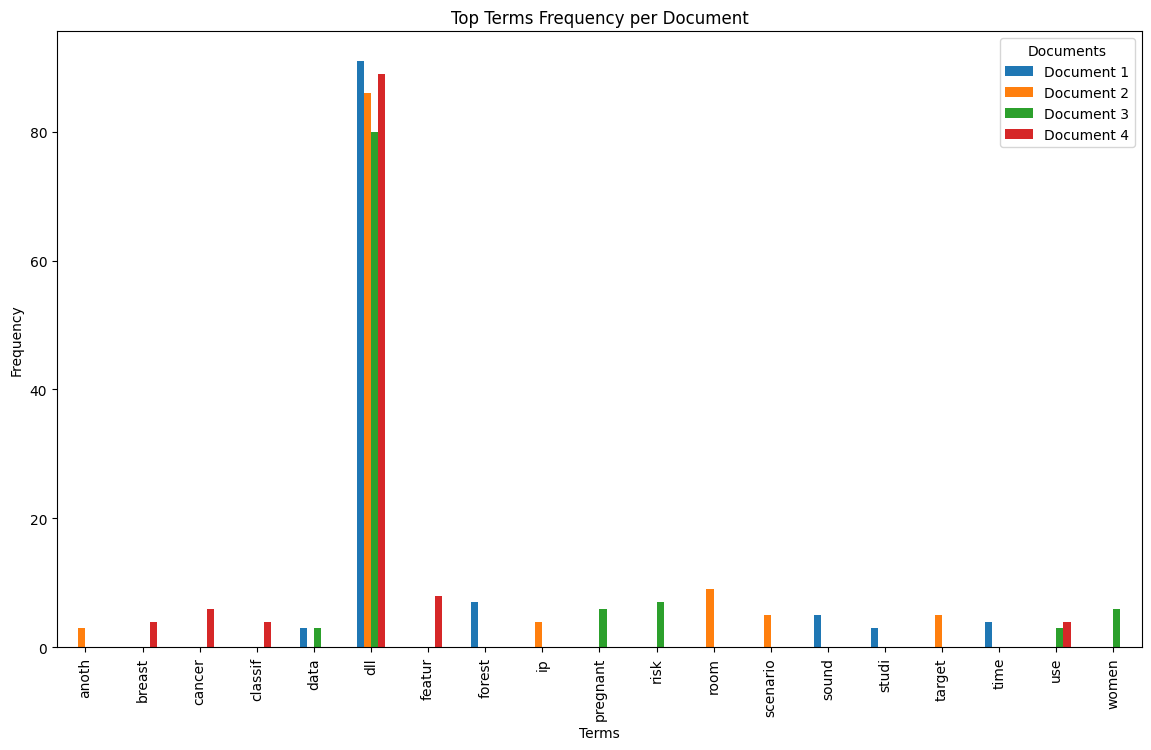

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Preprocessing function (seperti yang sebelumnya sudah dibuat)
def preprocess(text):
    words = word_tokenize(text.lower())
    words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

# Preprocess abstracts
df['processed_abstract'] = df['abstract'].apply(preprocess)

# Menghitung Term Frequency menggunakan CountVectorizer
vectorizer = CountVectorizer()
term_matrix = vectorizer.fit_transform(df['processed_abstract'])

# Konversi ke DataFrame
term_df = pd.DataFrame(term_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)

# Menyusun data term frequency untuk beberapa term saja
top_terms_per_doc = {}
for idx, row in term_df.iterrows():
    top_terms = row.sort_values(ascending=False).head(5)  # Mengambil 5 term teratas
    other_sum = row.sum() - top_terms.sum()  # Menghitung sisa frekuensi term yang lain
    top_terms['dll'] = other_sum  # Menyederhanakan sisa term sebagai 'dll'
    top_terms_per_doc[f'Document {idx}'] = top_terms

# Konversi ke DataFrame
top_terms_df = pd.DataFrame(top_terms_per_doc)

# Tampilkan top terms per document
print("Top Terms per Document:")
print(top_terms_df)

# Plotting Top Terms per Document
top_terms_df.plot(kind='bar', figsize=(14, 8))
plt.title('Top Terms Frequency per Document')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.legend(title="Documents")
plt.show()
